In [1]:
### Dorsa Farzaneh Ghasri_Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns #regplot
from sklearn.preprocessing import LabelEncoder #for labling the Address column
from sklearn.impute import KNNImputer #KNN imputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler #normalizing
from sklearn.model_selection import train_test_split #train and test
from sklearn.linear_model import LinearRegression #linear regression
from sklearn.metrics import mean_squared_error, r2_score #Evaluating



In [3]:
###importing the dataframe
df = pd.read_csv(r'C:\Users\ASUS\Desktop\regression\HousePrice1.csv')

In [4]:
# finding type of each column:
df.dtypes

Area          float64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price           int64
Price(USD)    float64
dtype: object

In [5]:
# Display the dataframe (tail)
df.tail(10)

Area  Room  Parking  Warehouse  Elevator             Address  \
3469   74.0     2     True       True      True              Mehran   
3470   97.0     2     True       True      True             Shahran   
3471   94.0     2     True       True      True            Niavaran   
3472  113.0     3     True       True      True         Ostad Moein   
3473   63.0     1     True       True     False         Feiz Garden   
3474   86.0     2     True       True      True  Southern Janatabad   
3475   83.0     2     True       True      True            Niavaran   
3476   75.0     2    False      False     False              Parand   
3477  105.0     2     True       True      True              Dorous   
3478   82.0     2    False       True      True              Parand   

           Price  Price(USD)  
3469  4070000000   135666.67  
3470  2700000000    90000.00  
3471  8450000000   281666.67  
3472  3170000000   105666.67  
3473  1890000000    63000.00  
3474  3500000000   116666.67  
3475  6800000000   226666.67  
3476   365000000    12166.67  
3477  5600000000   186666.67  
3478   360000000    12000.00

In [6]:
# Display the dataframe (head)
df.head(10)

Area  Room  Parking  Warehouse  Elevator                     Address  \
0   63.0     1     True       True      True                     Shahran   
1   60.0     1     True       True      True                     Shahran   
2   79.0     2     True       True      True                      Pardis   
3    NaN     2     True       True      True               Shahrake Qods   
4  123.0     2     True       True      True              Shahrake Gharb   
5   70.0     2     True       True     False  North Program Organization   
6   87.0     2     True       True      True                      Pardis   
7   59.0     1     True       True      True                     Shahran   
8   54.0     2     True       True     False                    Andisheh   
9   71.0     1     True       True      True      West Ferdows Boulevard   

        Price  Price(USD)  
0  1850000000    61666.67  
1  1850000000    61666.67  
2   550000000    18333.33  
3   902500000    30083.33  
4  7000000000   233333.33  
5  2050000000    68333.33  
6   600000000    20000.00  
7  2150000000    71666.67  
8   493000000    16433.33  
9  2370000000    79000.00

In [7]:
#Display the shape
df.shape

(3479, 8)

In [8]:
# Display duplicated values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3474    False
3475    False
3476     True
3477    False
3478    False
Length: 3479, dtype: bool

In [9]:
#Display number of null values
df.isna().sum()

Area           9
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3470 non-null   float64
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.2+ KB


Text(0, 0.5, 'Count')

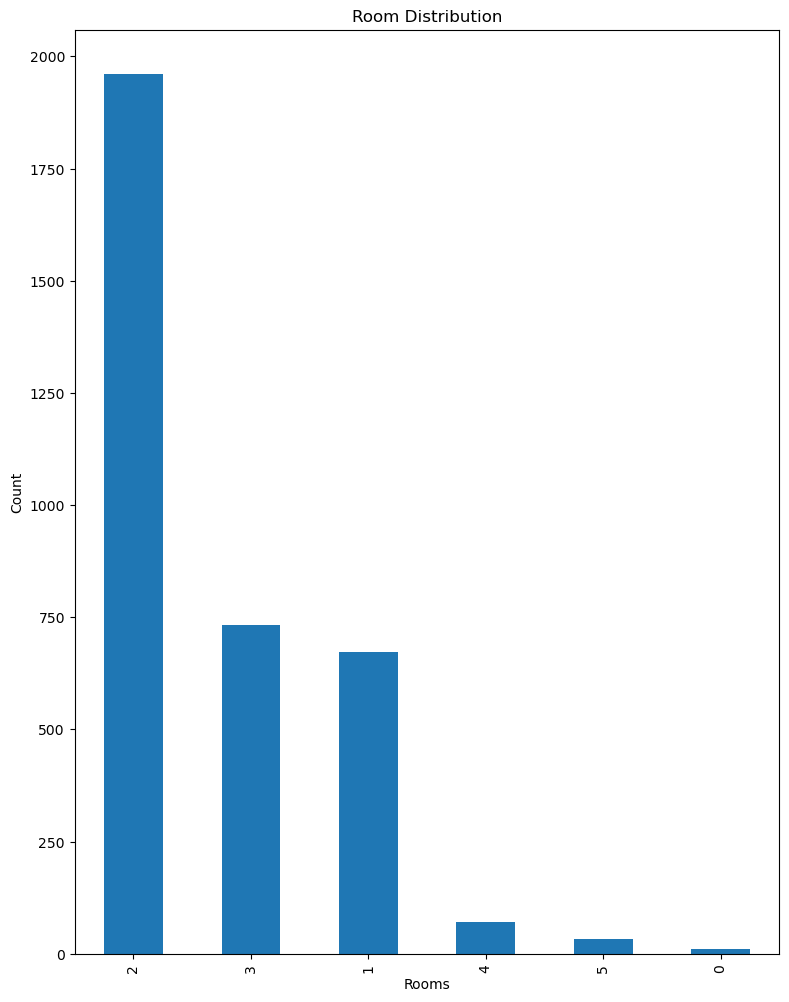

In [11]:
#### Distirbution Chart 

# Create distribution charts
plt.figure(figsize=(20,12))

# Room distribution
plt.subplot(1, 2, 1)
df['Room'].value_counts().plot(kind='bar')
plt.title('Room Distribution')
plt.xlabel('Rooms')
plt.ylabel('Count')

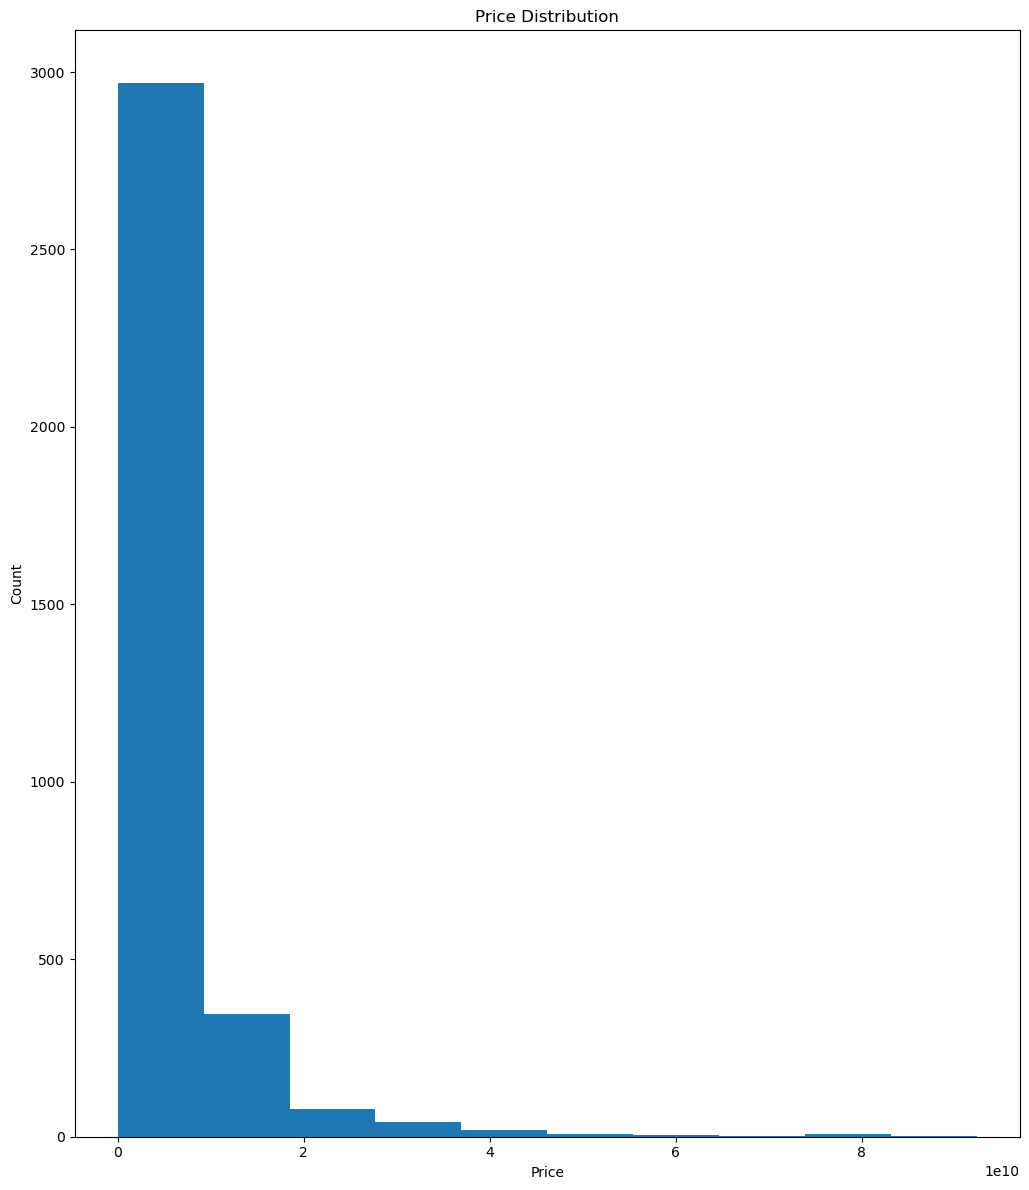

In [12]:
# Price distribution
plt.figure(figsize=(20,12))
plt.subplot(1, 2, 2)
df['Price'].plot(kind='hist', bins=10)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')

plt.tight_layout()

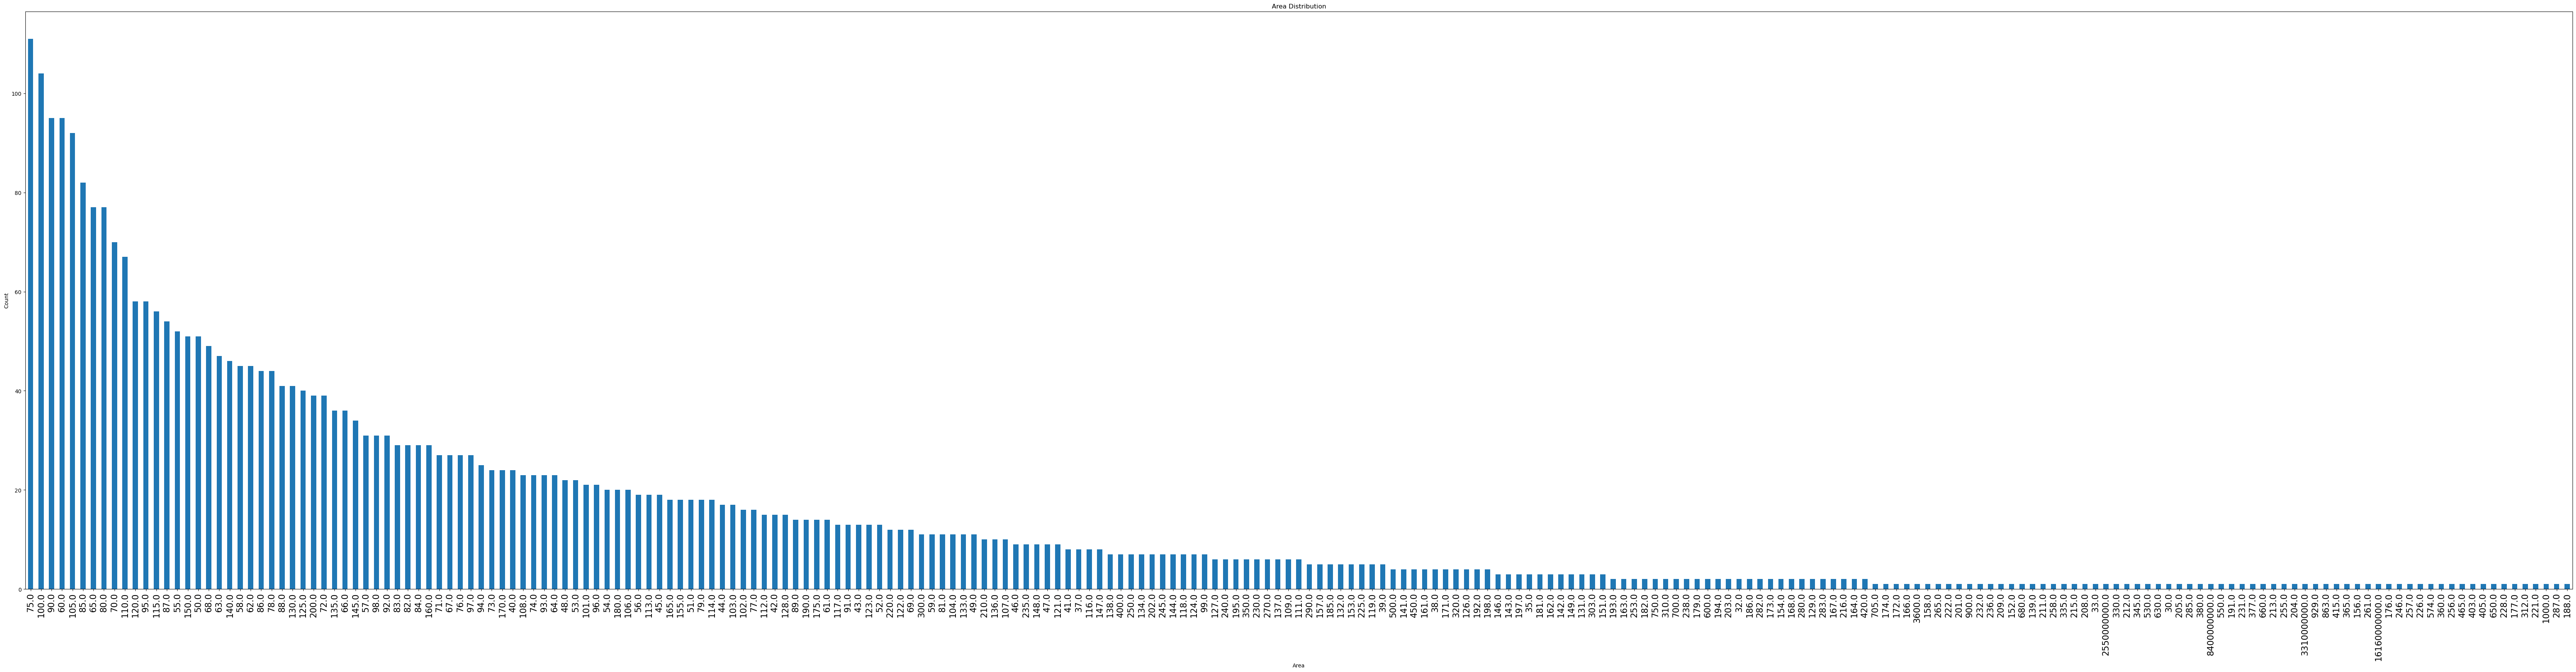

In [13]:
# Area distribution
plt.figure(figsize=(200,50))
plt.subplot(3, 3, 1)
df['Area'].value_counts().plot(kind='bar')
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=16)
plt.tight_layout()

Text(0, 0.5, 'Count')

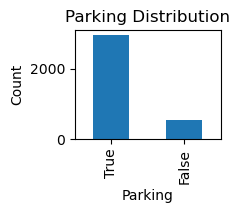

In [14]:
# Parking distribution

plt.subplot(3, 3, 3)
df['Parking'].value_counts().plot(kind='bar')
plt.title('Parking Distribution')
plt.xlabel('Parking')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

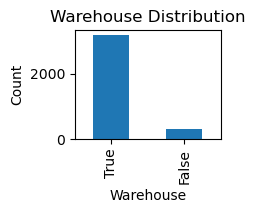

In [15]:
# Warehouse distribution
plt.subplot(3, 3, 4)
df['Warehouse'].value_counts().plot(kind='bar')
plt.title('Warehouse Distribution')
plt.xlabel('Warehouse')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

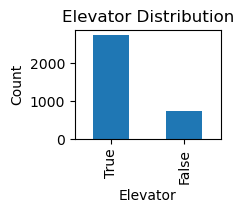

In [16]:
# Elevator distribution
plt.subplot(3, 3, 5)
df['Elevator'].value_counts().plot(kind='bar')
plt.title('Elevator Distribution')
plt.xlabel('Elevator')
plt.ylabel('Count')

In [17]:
# Address distribution
plt.figure(figsize=(300, 100))
plt.subplot(1, 1, 1)
df['Address'].value_counts().plot(kind='bar')
plt.title('Address Distribution')
plt.xlabel('Address')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=90)
plt.show()

Text(0, 0.5, 'Count')

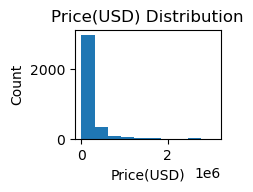

In [18]:
# Price(USD) distribution
plt.subplot(3, 3, 8)
df['Price(USD)'].plot(kind='hist', bins=10)
plt.title('Price(USD) Distribution')
plt.xlabel('Price(USD)')
plt.ylabel('Count')

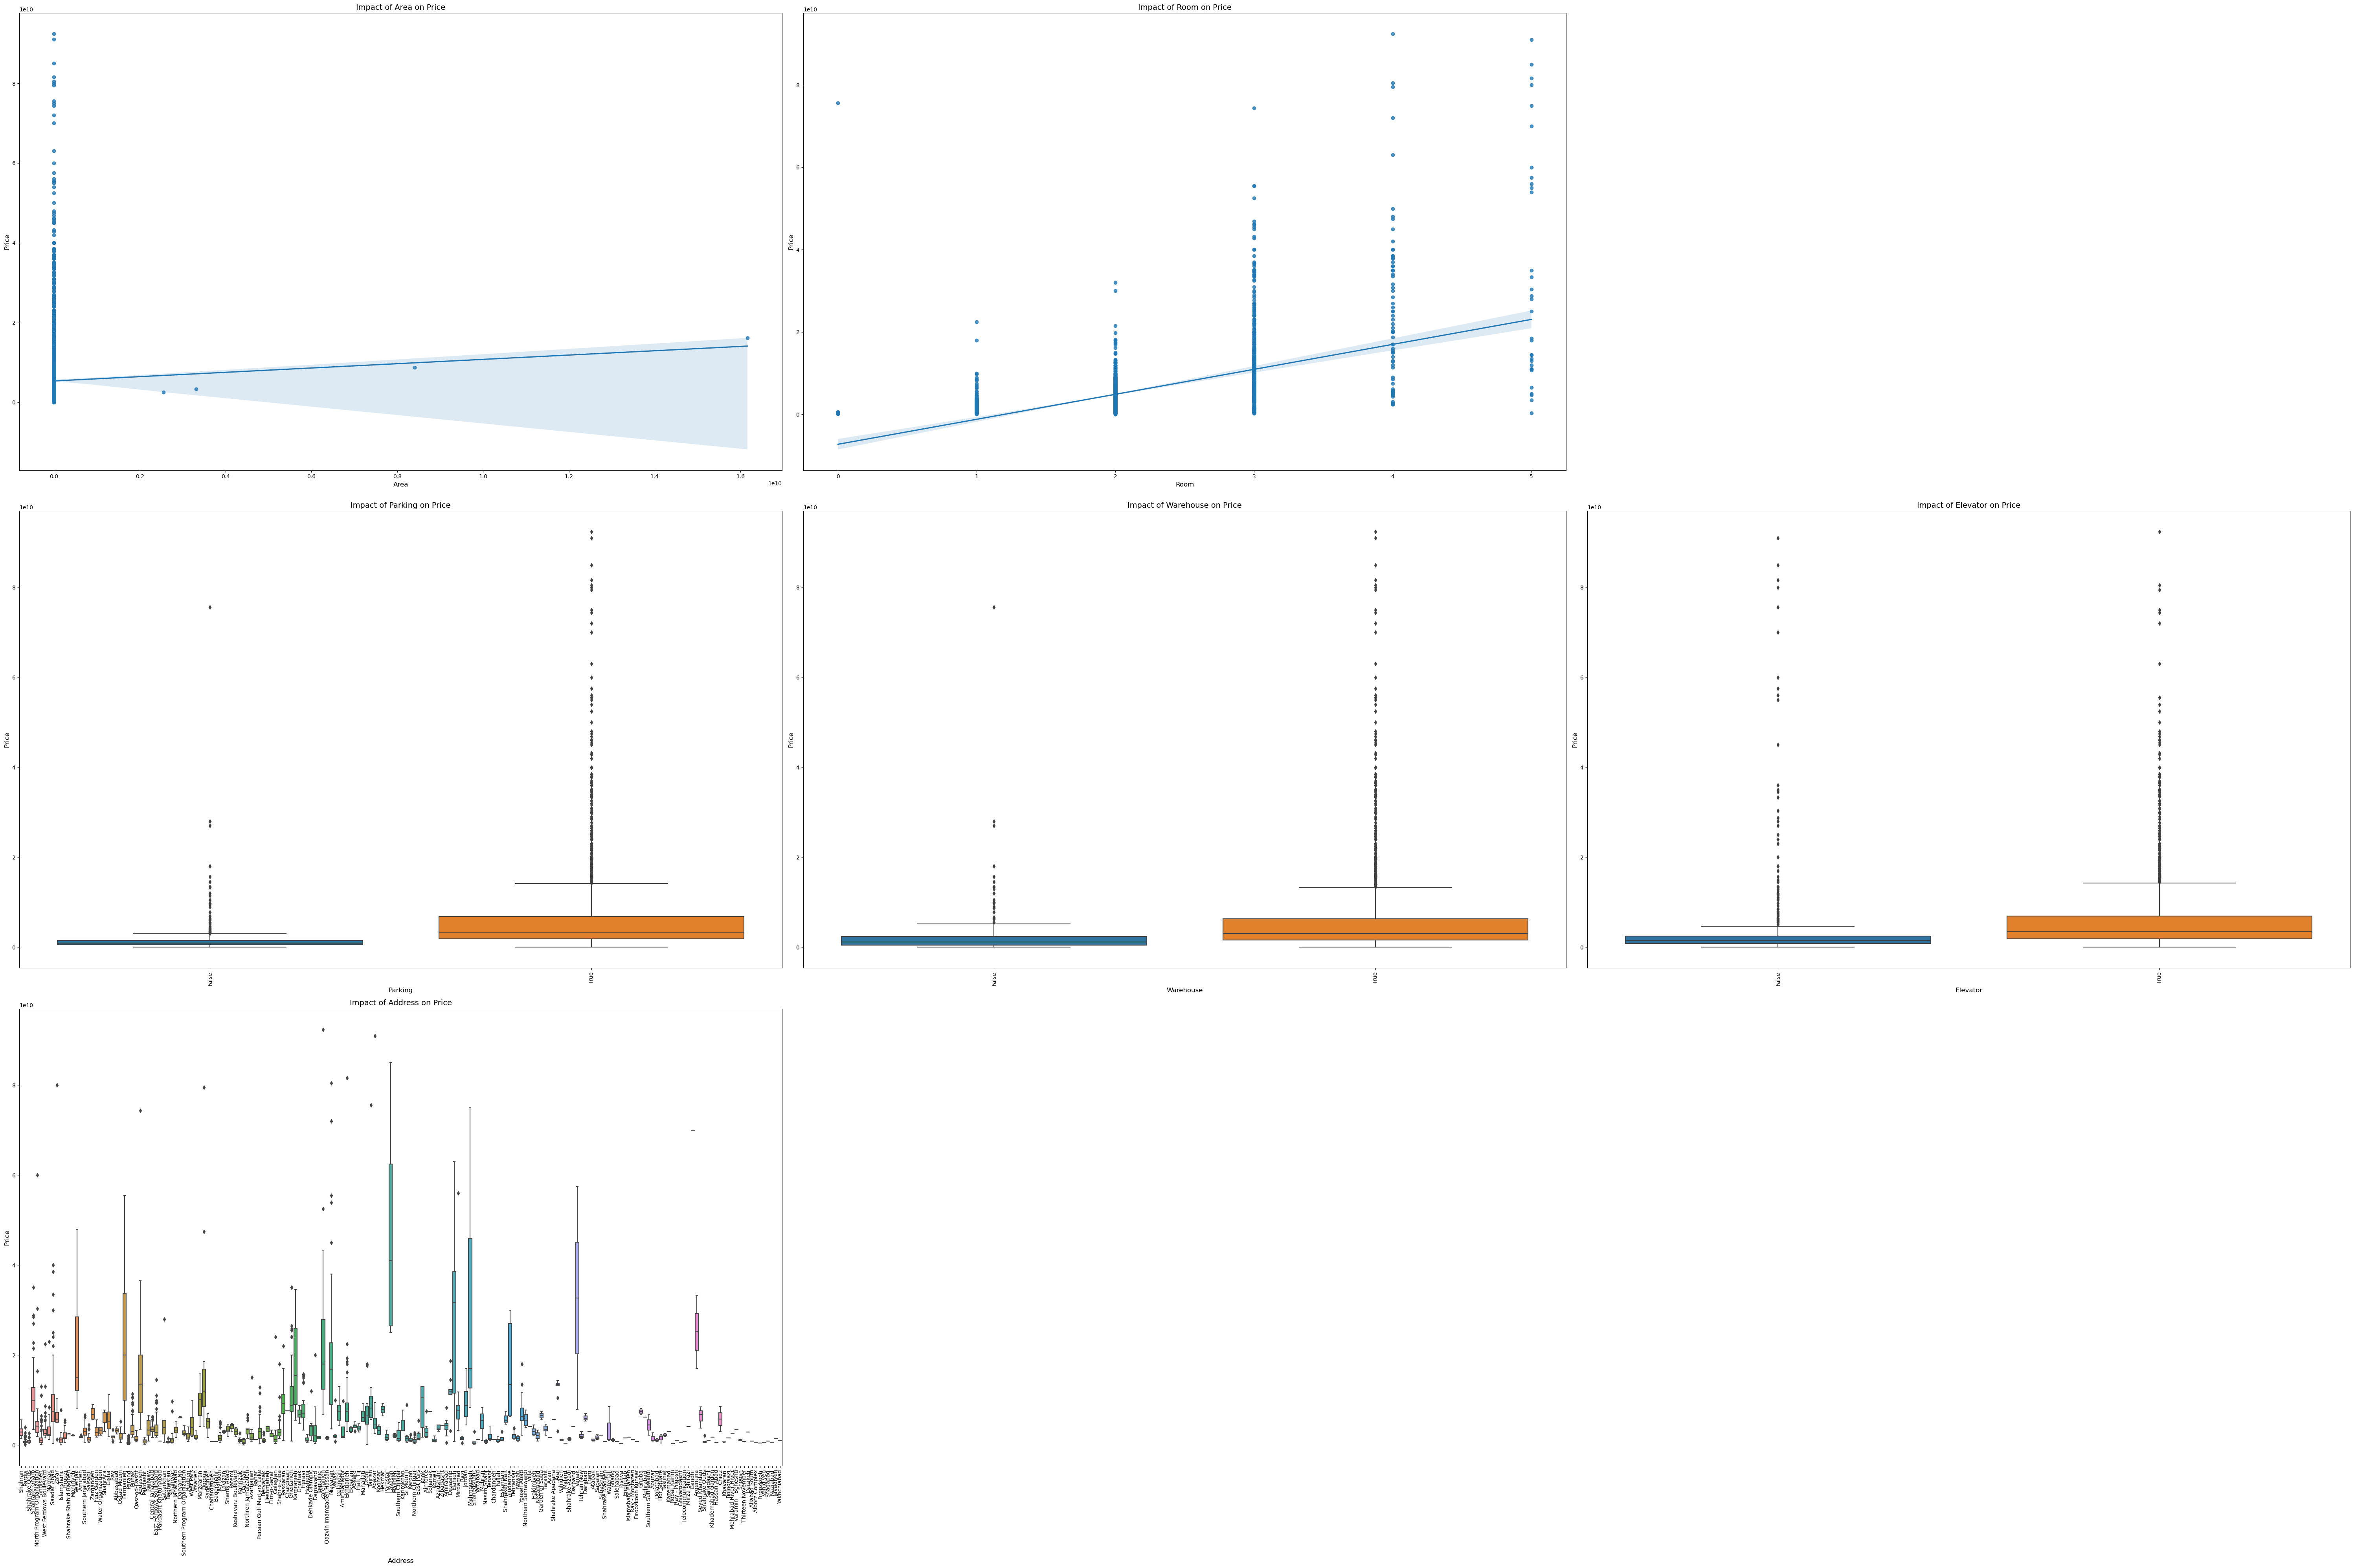

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### Regplot

# Create the regression plots
plt.figure(figsize=(60,40))

# Plot the impact of numerical features on 'Price'
for i, col in enumerate(df.select_dtypes(include='number').columns):
    if col != 'Price':
        plt.subplot(3, 3, i+1)
        sns.regplot(x=col, y='Price', data=df)
        plt.title(f'Impact of {col} on Price', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

# Plot the impact of categorical features on 'Price'
for i, col in enumerate(df.select_dtypes(exclude='number').columns):
    if col != 'Price':
        plt.subplot(3, 3, i+4)
        sns.boxplot(x=col, y='Price', data=df)
        plt.title(f'Impact of {col} on Price', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.xticks(fontsize=10, rotation=90)
        plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

Now we follow these steps:

    1.finding the null values
    2.dropping the missing values in 'Address' column
    3.Renaming all the missing values to NaN
    4.Converting the non numerics to numeric
    5.using KNN Imputer to replace NaN.

In [20]:
### Missing Values
df.isna().sum()

Area           9
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [21]:
### dropping the missing values
# It is important to assign it to df!!!
df = df.dropna(subset=['Address'])
df['Address'].isna().sum()

0

In [22]:
### Renaming Missing Values:

# Rename missing values in the entire DataFrame to 'NaN'
#df = df.fillna('NaN')

# Check for any remaining missing values in the DataFrame
#print(df.isnull().sum().sum())

In [23]:
# Get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3447 non-null   float64
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   int64  
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 172.1+ KB


In [24]:

# Replace 'true' with 1 and 'false' with 0
df['Parking'] = df['Parking'].replace({'true': 1, 'false': 0})
df['Warehouse'] = df['Warehouse'].replace({'true': 1, 'false': 0})
df['Elevator'] = df['Elevator'].replace({'true': 1, 'false': 0})

# Convert the data type to integer
df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)

In [25]:
df.head()

Area  Room  Parking  Warehouse  Elevator         Address       Price  \
0   63.0     1        1          1         1         Shahran  1850000000   
1   60.0     1        1          1         1         Shahran  1850000000   
2   79.0     2        1          1         1          Pardis   550000000   
3    NaN     2        1          1         1   Shahrake Qods   902500000   
4  123.0     2        1          1         1  Shahrake Gharb  7000000000   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33

In [26]:
df.isna().sum()

Area          9
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [27]:
### Converting to numeric

# Convert the "Address" column to numerical representation
label_encoder = LabelEncoder()
df['Address'] = label_encoder.fit_transform(df['Address'])

In [28]:
# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Replace NaN values in the "Area" column
df['Area'] = imputer.fit_transform(df[['Area']]).flatten()
df['Area'] = df['Area'].apply(lambda x: '{:.1f}'.format(x))

# Replace NaN values in the "Address" column
df['Address'] = imputer.fit_transform(df[['Address']]).flatten()


In [29]:
df['Address']

0       156.0
1       156.0
2       117.0
3       152.0
4       150.0
        ...  
3474    163.0
3475    105.0
3476    115.0
3477     39.0
3478    115.0
Name: Address, Length: 3456, dtype: float64

In [30]:
df['Area']

0            63.0
1            60.0
2            79.0
3       8825173.2
4           123.0
          ...    
3474         86.0
3475         83.0
3476         75.0
3477        105.0
3478         82.0
Name: Area, Length: 3456, dtype: object

In [31]:
###Removing Outliers:

for col in df.columns:
    if df[col].dtype != 'object':
        z_scores = abs(zscore(df[col]))
        outliers = df[z_scores > 3]
        df= df[z_scores <= 3]
        #print(f"Outliers in '{col}' column:")
        #print(outliers)

#print("\nDataframe after removing outliers:")
#print(data)

In [32]:
df.shape

(2992, 8)

In [33]:
# Normalize the numeric columns

# Select the columns you want to normalize
cols_to_normalize = [col for col in df.columns if col != 'Price']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


In [34]:
df.head()

Area      Room   Parking  Warehouse  Elevator   Address       Price  \
0 -0.029853 -1.568827  0.353287        0.0  0.481965  0.991110  1850000000   
1 -0.029853 -1.568827  0.353287        0.0  0.481965  0.991110  1850000000   
2 -0.029853 -0.048772  0.353287        0.0  0.481965  0.217936   550000000   
3 -0.004008 -0.048772  0.353287        0.0  0.481965  0.911810   902500000   
4 -0.029853 -0.048772  0.353287        0.0  0.481965  0.872160  7000000000   

   Price(USD)  
0   -0.615341  
1   -0.615341  
2   -0.966320  
3   -0.871151  
4    0.775075

In [35]:
# Split the data into training and test sets
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (2393, 7) (2393,)
Test set shape: (599, 7) (599,)


In [36]:
### Fitiing the data

lr = LinearRegression()
lr.fit(X_train, y_train)

# Get the intercept and coefficients
intercept = lr.intercept_
coefficients = lr.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 4129180113.2360706
Coefficients: [-1.16835834e+00  2.24457486e+00  9.70953279e-01  1.78813934e-07
 -1.32962745e+00 -3.19866503e+00  3.70392721e+09]


In [37]:
### Evaluating the model

# 1. Mean Squared Error (MSE)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# 2. R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# 3. Coefficient of Determination (R2 score)
print(f"Coefficient of Determination: {lr.score(X_test, y_test):.2f}")

# 4. Intercept and Coefficients
print(f"Intercept: {lr.intercept_:.2f}")
print("Coefficients:")
for i, coef in enumerate(lr.coef_):
    print(f"Feature {i+1}: {coef:.2f}")

Mean Squared Error: 6395.85
R-squared: 1.00
Coefficient of Determination: 1.00
Intercept: 4129180113.24
Coefficients:
Feature 1: -1.17
Feature 2: 2.24
Feature 3: 0.97
Feature 4: 0.00
Feature 5: -1.33
Feature 6: -3.20
Feature 7: 3703927211.62
